https://towardsdatascience.com/preprocessing-text-data-using-python-576206753c28

https://towardsdatascience.com/nlp-part-3-exploratory-data-analysis-of-text-data-1caa8ab3f79d

In [1]:
import pandas as pd
import numpy as np
import nltk
import string
import fasttext
import spacy
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from nltk import word_tokenize, pos_tag
plt.xticks(rotation=70)
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)
%matplotlib inline
import importlib
import pickle
import pyLDAvis.sklearn
from collections import Counter
from textblob import TextBlob
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)


C:\Users\mwamb\Anaconda3\lib\site-packages\past\builtins\misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping


In [2]:
def file_reader(file):
    pages = p.PdfFileReader(file)
    p_numbers = pages.getNumPages()
    text = ""
    
    for p_number in range(p_numbers):
        page = pages.getPage(p_number)
        text += page.extractText()
        
    return text

In [3]:
import PyPDF2 as p

HRCIOM_data = file_reader("C:/Users/mwamb/Desktop/Desktop/tenthdimensionanalytics/HCR IOM/HCR_IOM_result.pdf")


In [4]:
HRCIOM_data

'GLOBAL \nTRENDSFORCED DISPLACEMENT\n IN 20192019 IN REVIEW\nTrends at a Glance\nat the end of 2019 as a result of persecution, con˜ict, \nviolence, human rights violations or events seriously \n\ndisturbing public order.\n79.5 \nMILLION\nFORCIBLY DISPLACED WORLDWIDE\n107,800\nREFUGEES \nRESETTLED\nUNHCR submitted 81,600 refugees \nto States for resettlement. \n\nAccording to government statistics, \n\n26 countries admitted 107,800 \n\nrefugees for resettlement during \n the year, with or without UNHCR™s \n\nassistance.\n40%\n CHILDREN\nAn estimated 30 ˜ 34 million of  \n\nthe 79.5 million forcibly displaced \n\npersons were children below \n \n18 years of age.\n5.6\n MILLION\n DISPLACED PEOPLE \nRETURNED \n5.6 million displaced people \n\nreturned to their areas or countries \n\nof origin, including 5.3 million \n\ninternally displaced persons and \n\n317,200 refugees. \n2.0\n MILLION\n NEW CLAIMS\nAsylum-seekers submitted 2.0 million \n\nnew claims. The United States of \n\nAmerica w

In [5]:
clusterHCRIOM = 'HCR IOM'
wordsHRCIOM = HRCIOM_data

In [6]:
df = pd.DataFrame({'cluster': clusterHCRIOM, 'words': HRCIOM_data}, index=[0])

In [7]:
df

,cluster,words
0,HCR IOM,GLOBAL \nTRENDSFORCED DISPLACEMENT\n IN 20192019 IN REVIEW\nTrends at a Glance\nat the end of 20...


In [8]:
#df.to_pickle('C:/Users/jeanl/Desktop/tenthdimensionanalytics/WFP/wfpdata')

df.to_pickle("C:/Users/mwamb/Desktop/Desktop/tenthdimensionanalytics/HCR IOM/hcriomdata")

## Text Pre-Processing

### Expanding Contractions

In [9]:
df['words_description'] = df['words'].apply(lambda x: [contractions.fix(word) for word in x.split()])
df.head()

,cluster,words,words_description
0,HCR IOM,GLOBAL \nTRENDSFORCED DISPLACEMENT\n IN 20192019 IN REVIEW\nTrends at a Glance\nat the end of 20...,"[GLOBAL, TRENDSFORCED, DISPLACEMENT, IN, 20192019, IN, REVIEW, Trends, at, a, Glance, at, the, e..."


In [10]:
df['words_description_str'] = [' '.join(map(str, l)) for l in df['words_description']]
df.head()

,cluster,words,words_description,words_description_str
0,HCR IOM,GLOBAL \nTRENDSFORCED DISPLACEMENT\n IN 20192019 IN REVIEW\nTrends at a Glance\nat the end of 20...,"[GLOBAL, TRENDSFORCED, DISPLACEMENT, IN, 20192019, IN, REVIEW, Trends, at, a, Glance, at, the, e...",GLOBAL TRENDSFORCED DISPLACEMENT IN 20192019 IN REVIEW Trends at a Glance at the end of 2019 as ...


### English Language Detection

In [11]:
pretrained_model = "C:/Users/mwamb/Downloads/lid.176.bin" 
model = fasttext.load_model(pretrained_model)
langs = []
for sent in df['words_description_str']:
    lang = model.predict(sent)[0]
    langs.append(str(lang)[11:13])
df['langs'] = langs

In [12]:
df

,cluster,words,words_description,words_description_str,langs
0,HCR IOM,GLOBAL \nTRENDSFORCED DISPLACEMENT\n IN 20192019 IN REVIEW\nTrends at a Glance\nat the end of 20...,"[GLOBAL, TRENDSFORCED, DISPLACEMENT, IN, 20192019, IN, REVIEW, Trends, at, a, Glance, at, the, e...",GLOBAL TRENDSFORCED DISPLACEMENT IN 20192019 IN REVIEW Trends at a Glance at the end of 2019 as ...,en


## Tokenization

In [13]:
df['tokenized'] = df['words_description_str'].apply(word_tokenize)
df.head()

,cluster,words,words_description,words_description_str,langs,tokenized
0,HCR IOM,GLOBAL \nTRENDSFORCED DISPLACEMENT\n IN 20192019 IN REVIEW\nTrends at a Glance\nat the end of 20...,"[GLOBAL, TRENDSFORCED, DISPLACEMENT, IN, 20192019, IN, REVIEW, Trends, at, a, Glance, at, the, e...",GLOBAL TRENDSFORCED DISPLACEMENT IN 20192019 IN REVIEW Trends at a Glance at the end of 2019 as ...,en,"[GLOBAL, TRENDSFORCED, DISPLACEMENT, IN, 20192019, IN, REVIEW, Trends, at, a, Glance, at, the, e..."


## Converting all Characters to Lowercase

In [14]:
df['lower'] = df['tokenized'].apply(lambda x: [word.lower() for word in x])
df.head()

,cluster,words,words_description,words_description_str,langs,tokenized,lower
0,HCR IOM,GLOBAL \nTRENDSFORCED DISPLACEMENT\n IN 20192019 IN REVIEW\nTrends at a Glance\nat the end of 20...,"[GLOBAL, TRENDSFORCED, DISPLACEMENT, IN, 20192019, IN, REVIEW, Trends, at, a, Glance, at, the, e...",GLOBAL TRENDSFORCED DISPLACEMENT IN 20192019 IN REVIEW Trends at a Glance at the end of 2019 as ...,en,"[GLOBAL, TRENDSFORCED, DISPLACEMENT, IN, 20192019, IN, REVIEW, Trends, at, a, Glance, at, the, e...","[global, trendsforced, displacement, in, 20192019, in, review, trends, at, a, glance, at, the, e..."


### Removing Punctuations

In [15]:
punc = string.punctuation
df['no_punc'] = df['lower'].apply(lambda x: [word for word in x if word not in punc])
df.head()

,cluster,words,words_description,words_description_str,langs,tokenized,lower,no_punc
0,HCR IOM,GLOBAL \nTRENDSFORCED DISPLACEMENT\n IN 20192019 IN REVIEW\nTrends at a Glance\nat the end of 20...,"[GLOBAL, TRENDSFORCED, DISPLACEMENT, IN, 20192019, IN, REVIEW, Trends, at, a, Glance, at, the, e...",GLOBAL TRENDSFORCED DISPLACEMENT IN 20192019 IN REVIEW Trends at a Glance at the end of 2019 as ...,en,"[GLOBAL, TRENDSFORCED, DISPLACEMENT, IN, 20192019, IN, REVIEW, Trends, at, a, Glance, at, the, e...","[global, trendsforced, displacement, in, 20192019, in, review, trends, at, a, glance, at, the, e...","[global, trendsforced, displacement, in, 20192019, in, review, trends, at, a, glance, at, the, e..."


### Removing Stopwords

In [16]:
stop_words = set(stopwords.words('english'))
df['stopwords_removed'] = df['no_punc'].apply(lambda x: [word for word in x if word not in stop_words])
df.head()

,cluster,words,words_description,words_description_str,langs,tokenized,lower,no_punc,stopwords_removed
0,HCR IOM,GLOBAL \nTRENDSFORCED DISPLACEMENT\n IN 20192019 IN REVIEW\nTrends at a Glance\nat the end of 20...,"[GLOBAL, TRENDSFORCED, DISPLACEMENT, IN, 20192019, IN, REVIEW, Trends, at, a, Glance, at, the, e...",GLOBAL TRENDSFORCED DISPLACEMENT IN 20192019 IN REVIEW Trends at a Glance at the end of 2019 as ...,en,"[GLOBAL, TRENDSFORCED, DISPLACEMENT, IN, 20192019, IN, REVIEW, Trends, at, a, Glance, at, the, e...","[global, trendsforced, displacement, in, 20192019, in, review, trends, at, a, glance, at, the, e...","[global, trendsforced, displacement, in, 20192019, in, review, trends, at, a, glance, at, the, e...","[global, trendsforced, displacement, 20192019, review, trends, glance, end, 2019, result, persec..."


## Stemming vs Lemmatization

In [17]:
df['pos_tags'] = df['stopwords_removed'].apply(nltk.tag.pos_tag)
df.head()

,cluster,words,words_description,words_description_str,langs,tokenized,lower,no_punc,stopwords_removed,pos_tags
0,HCR IOM,GLOBAL \nTRENDSFORCED DISPLACEMENT\n IN 20192019 IN REVIEW\nTrends at a Glance\nat the end of 20...,"[GLOBAL, TRENDSFORCED, DISPLACEMENT, IN, 20192019, IN, REVIEW, Trends, at, a, Glance, at, the, e...",GLOBAL TRENDSFORCED DISPLACEMENT IN 20192019 IN REVIEW Trends at a Glance at the end of 2019 as ...,en,"[GLOBAL, TRENDSFORCED, DISPLACEMENT, IN, 20192019, IN, REVIEW, Trends, at, a, Glance, at, the, e...","[global, trendsforced, displacement, in, 20192019, in, review, trends, at, a, glance, at, the, e...","[global, trendsforced, displacement, in, 20192019, in, review, trends, at, a, glance, at, the, e...","[global, trendsforced, displacement, 20192019, review, trends, glance, end, 2019, result, persec...","[(global, JJ), (trendsforced, VBD), (displacement, JJ), (20192019, CD), (review, NN), (trends, N..."


In [18]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
df['wordnet_pos'] = df['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
df.head()

,cluster,words,words_description,words_description_str,langs,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos
0,HCR IOM,GLOBAL \nTRENDSFORCED DISPLACEMENT\n IN 20192019 IN REVIEW\nTrends at a Glance\nat the end of 20...,"[GLOBAL, TRENDSFORCED, DISPLACEMENT, IN, 20192019, IN, REVIEW, Trends, at, a, Glance, at, the, e...",GLOBAL TRENDSFORCED DISPLACEMENT IN 20192019 IN REVIEW Trends at a Glance at the end of 2019 as ...,en,"[GLOBAL, TRENDSFORCED, DISPLACEMENT, IN, 20192019, IN, REVIEW, Trends, at, a, Glance, at, the, e...","[global, trendsforced, displacement, in, 20192019, in, review, trends, at, a, glance, at, the, e...","[global, trendsforced, displacement, in, 20192019, in, review, trends, at, a, glance, at, the, e...","[global, trendsforced, displacement, 20192019, review, trends, glance, end, 2019, result, persec...","[(global, JJ), (trendsforced, VBD), (displacement, JJ), (20192019, CD), (review, NN), (trends, N...","[(global, a), (trendsforced, v), (displacement, a), (20192019, n), (review, n), (trends, n), (gl..."


In [19]:
wnl = WordNetLemmatizer()
df['lemmatized'] = df['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
df.head()

,cluster,words,words_description,words_description_str,langs,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized
0,HCR IOM,GLOBAL \nTRENDSFORCED DISPLACEMENT\n IN 20192019 IN REVIEW\nTrends at a Glance\nat the end of 20...,"[GLOBAL, TRENDSFORCED, DISPLACEMENT, IN, 20192019, IN, REVIEW, Trends, at, a, Glance, at, the, e...",GLOBAL TRENDSFORCED DISPLACEMENT IN 20192019 IN REVIEW Trends at a Glance at the end of 2019 as ...,en,"[GLOBAL, TRENDSFORCED, DISPLACEMENT, IN, 20192019, IN, REVIEW, Trends, at, a, Glance, at, the, e...","[global, trendsforced, displacement, in, 20192019, in, review, trends, at, a, glance, at, the, e...","[global, trendsforced, displacement, in, 20192019, in, review, trends, at, a, glance, at, the, e...","[global, trendsforced, displacement, 20192019, review, trends, glance, end, 2019, result, persec...","[(global, JJ), (trendsforced, VBD), (displacement, JJ), (20192019, CD), (review, NN), (trends, N...","[(global, a), (trendsforced, v), (displacement, a), (20192019, n), (review, n), (trends, n), (gl...","[global, trendsforced, displacement, 20192019, review, trend, glance, end, 2019, result, persecu..."


In [20]:
df.to_pickle("HRCIOM_clean_data.pkl")

In [21]:
df.to_csv('HCRIOM_clean_data.csv')

In [22]:
#with open('indeed_scrape_clean.pkl', 'rb') as pickle_file:
#    df = pickle.load(pickle_file)
df.to_pickle("C:/Users/mwamb/Desktop/Desktop/tenthdimensionanalytics/HCR IOM/hcriomdata_clean")

In [23]:
df = df[['cluster', 'lemmatized']]
df.head()

,cluster,lemmatized
0,HCR IOM,"[global, trendsforced, displacement, 20192019, review, trend, glance, end, 2019, result, persecu..."


## Sentiment Analysis

In [24]:
df['lemma_str'] = [' '.join(map(str,l)) for l in df['lemmatized']]
df.head()

,cluster,lemmatized,lemma_str
0,HCR IOM,"[global, trendsforced, displacement, 20192019, review, trend, glance, end, 2019, result, persecu...",global trendsforced displacement 20192019 review trend glance end 2019 result persecution con˜ic...


In [25]:
df['sentiment'] = df['lemma_str'].apply(lambda x: TextBlob(x).sentiment.polarity)
df.head()

,cluster,lemmatized,lemma_str,sentiment
0,HCR IOM,"[global, trendsforced, displacement, 20192019, review, trend, glance, end, 2019, result, persecu...",global trendsforced displacement 20192019 review trend glance end 2019 result persecution con˜ic...,0.085858


In [26]:
df['sentiment'] = df['lemma_str'].apply(lambda x: TextBlob(x).sentiment.polarity)
df.head()

,cluster,lemmatized,lemma_str,sentiment
0,HCR IOM,"[global, trendsforced, displacement, 20192019, review, trend, glance, end, 2019, result, persecu...",global trendsforced displacement 20192019 review trend glance end 2019 result persecution con˜ic...,0.085858


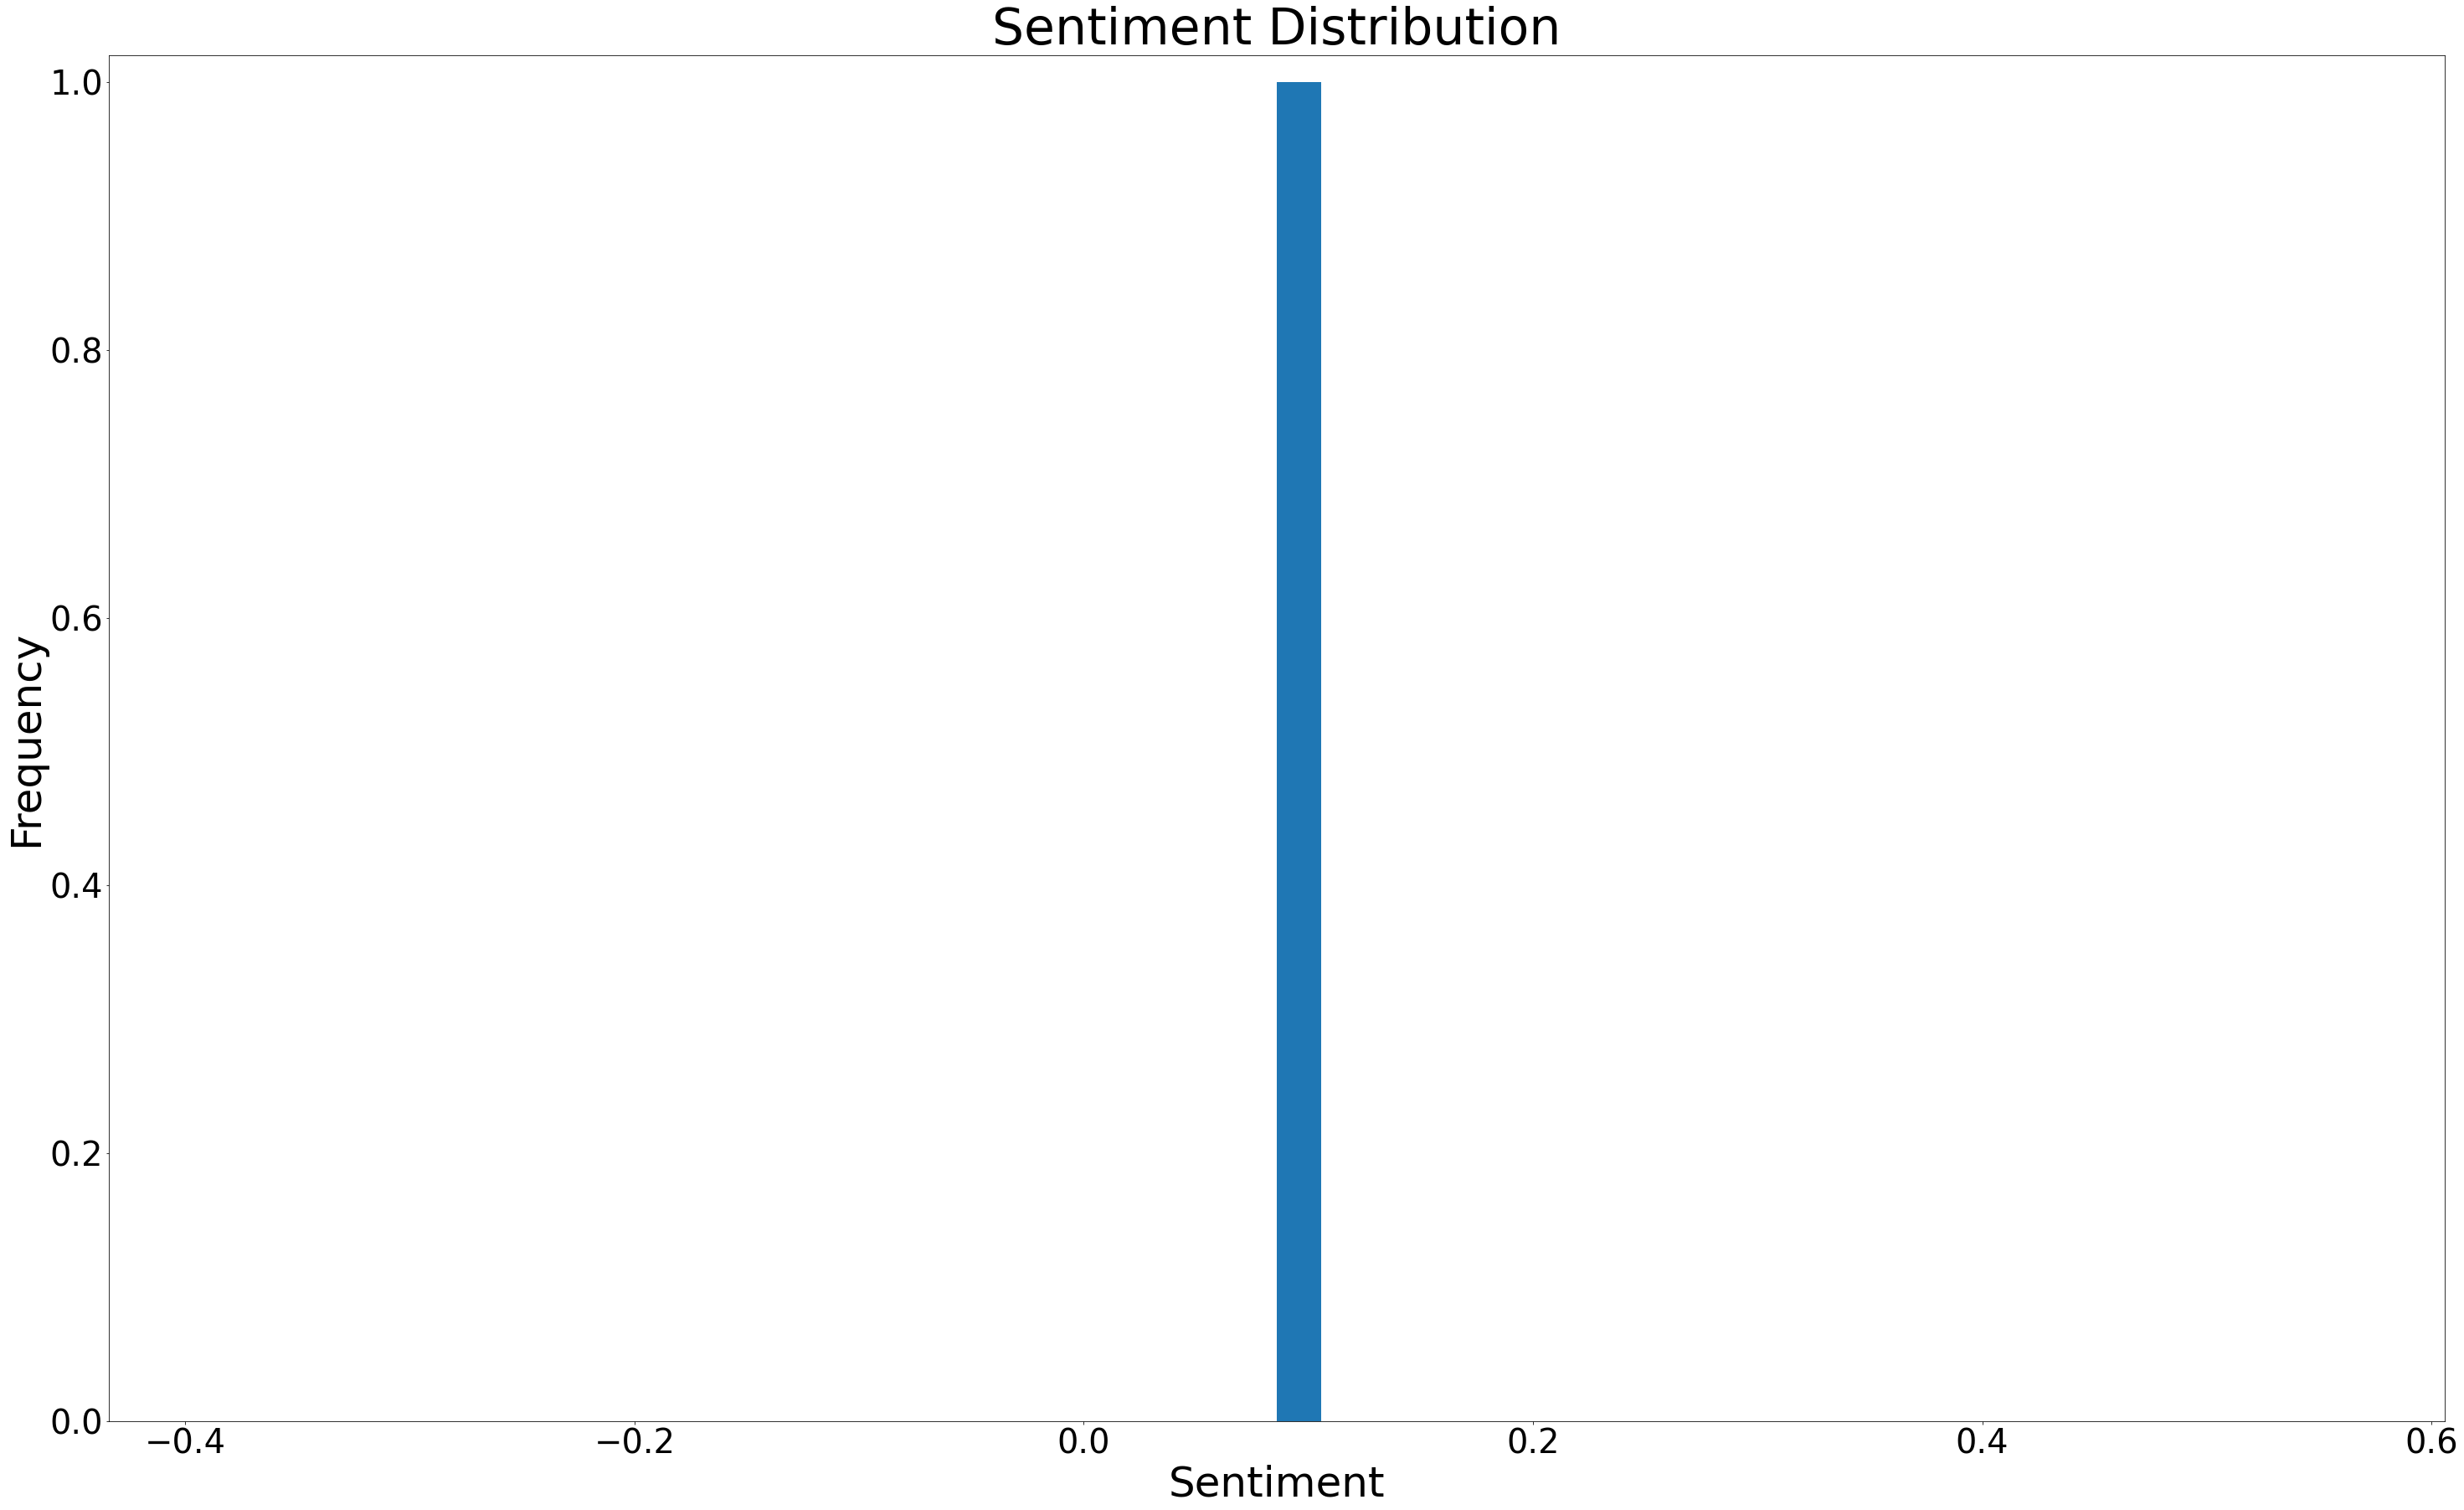

In [27]:
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.hist(df['sentiment'], bins=50)
plt.title('Sentiment Distribution', fontsize=60)
plt.show()

(array([0]), [Text(0, 0, 'HCR IOM')])

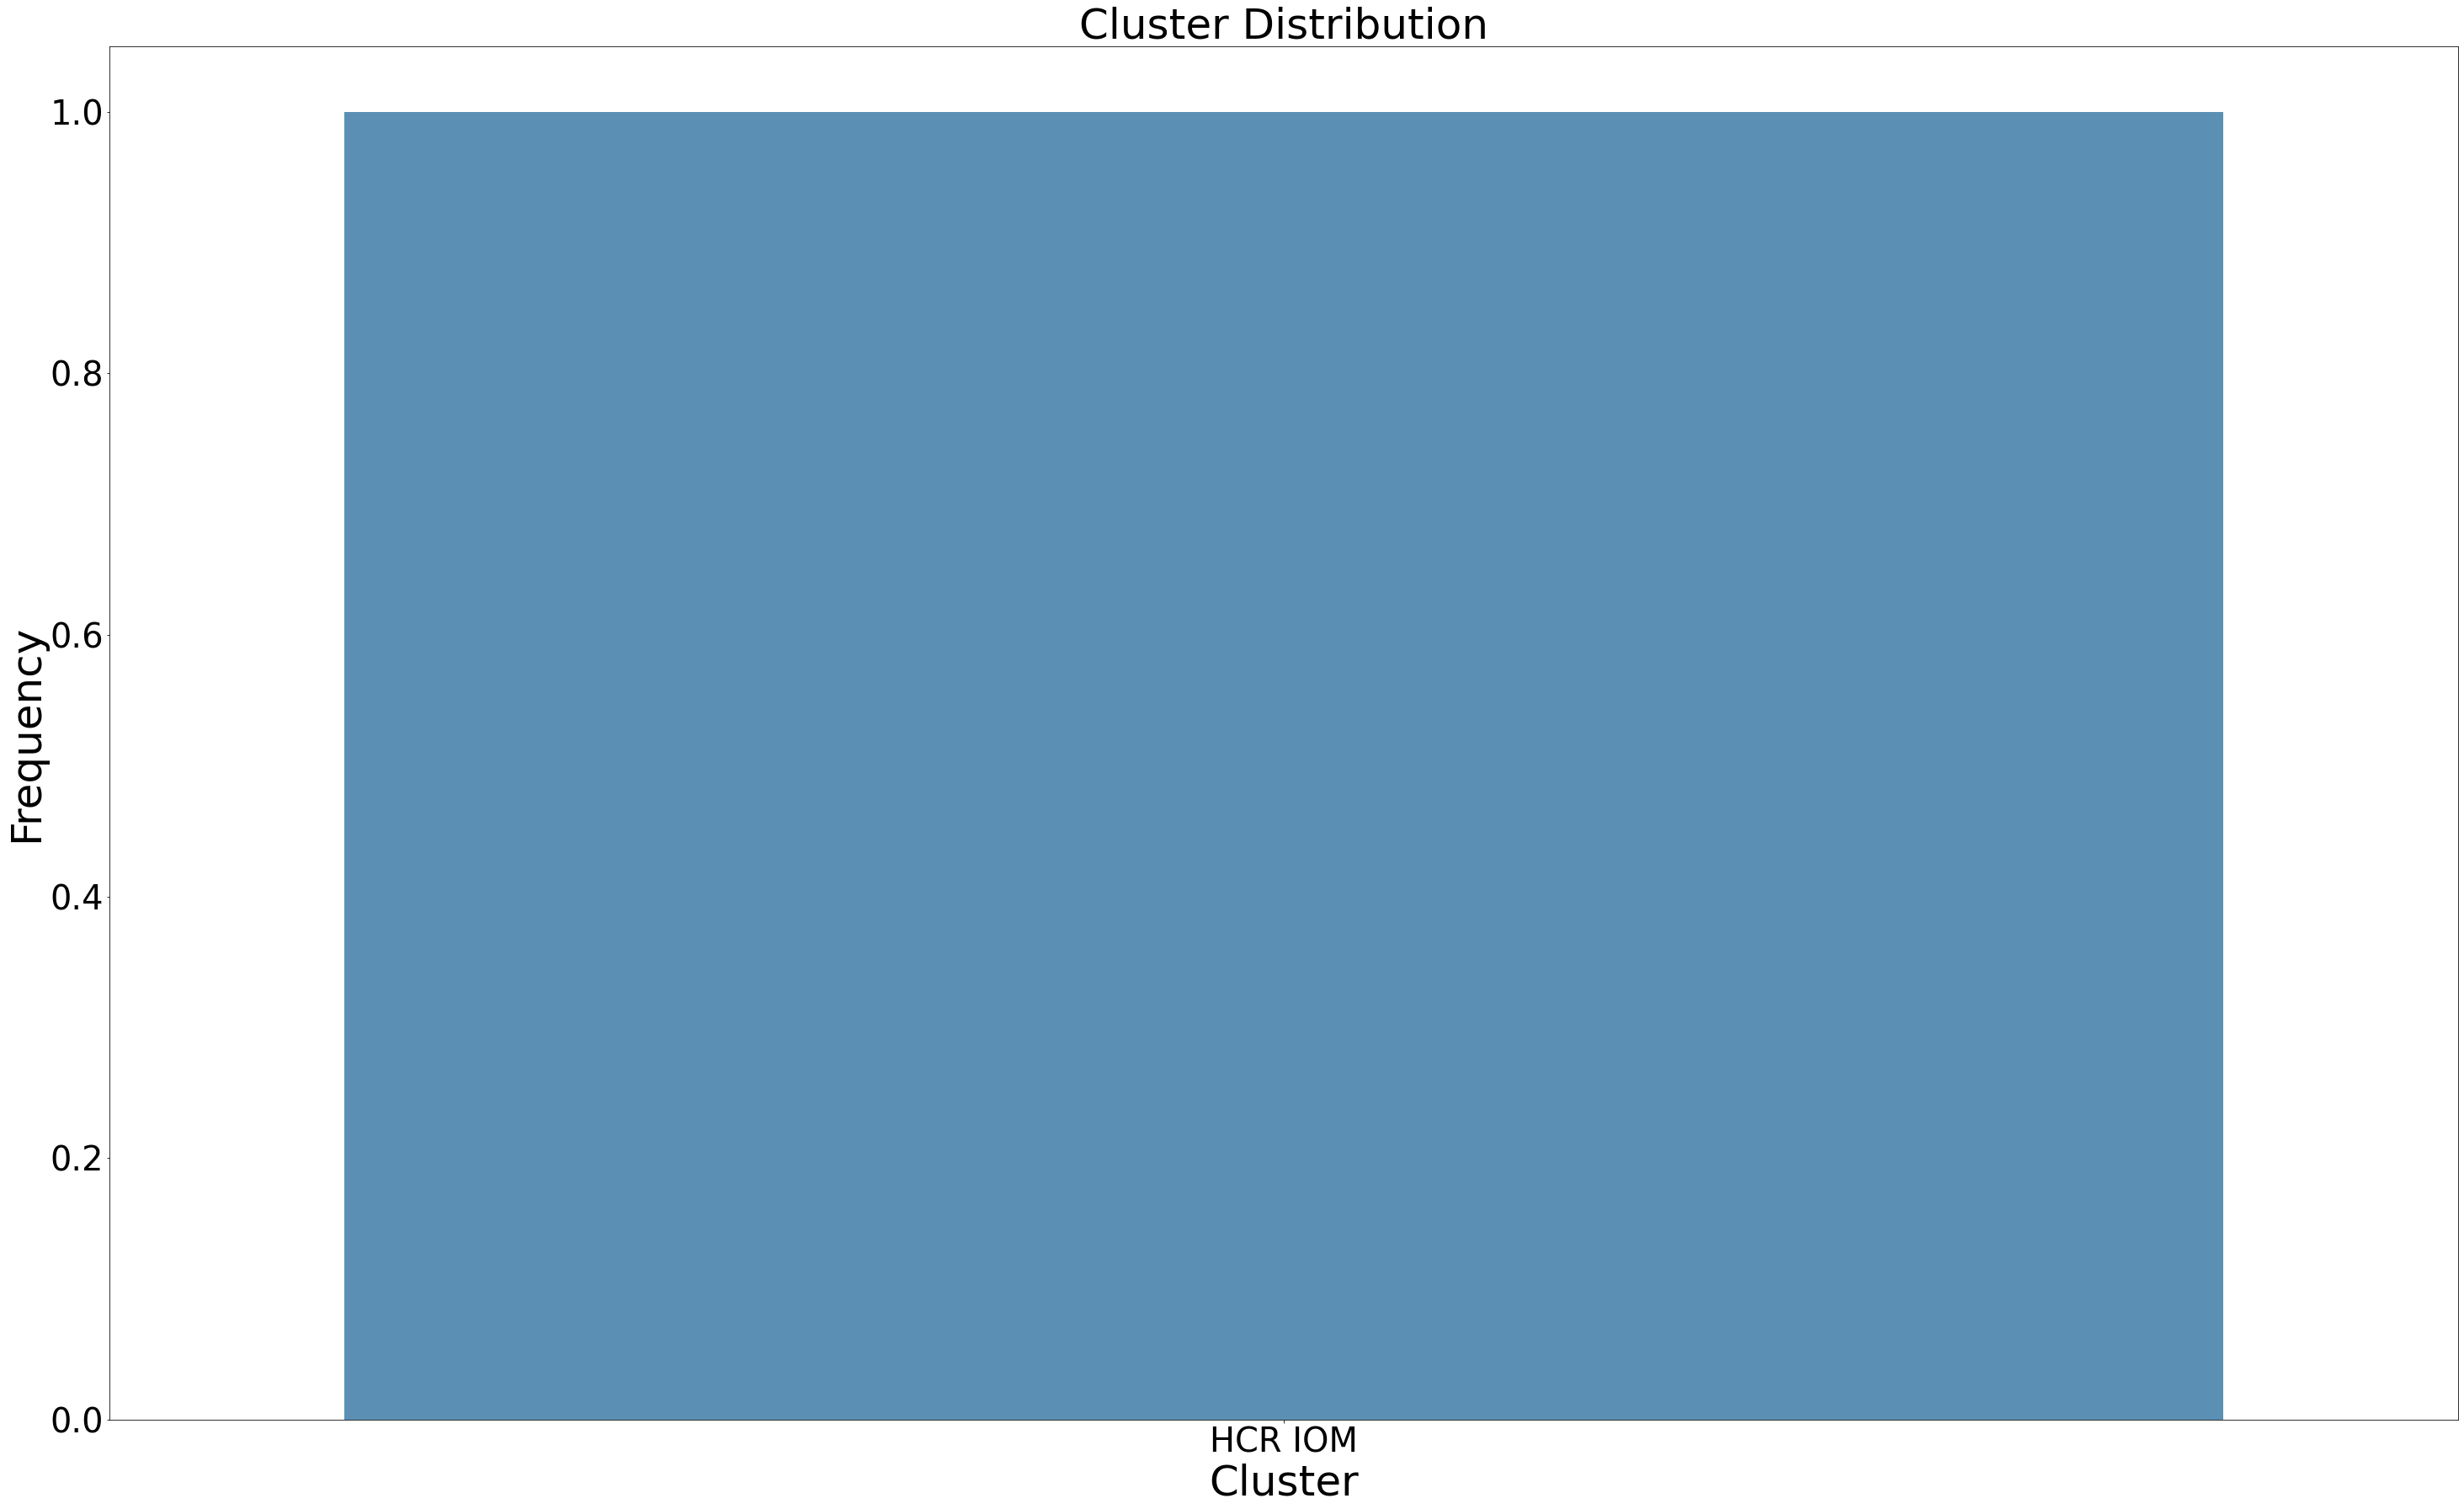

In [28]:
x_cluster = df.cluster.value_counts()
y_cluster = x_cluster.sort_index()
plt.figure(figsize=(50,30))
sns.barplot(x_cluster.index, x_cluster.values, alpha=0.8)
plt.title("Cluster Distribution", fontsize=50)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Cluster', fontsize=50)
plt.xticks(fontsize=40)

<AxesSubplot:title={'center':'Percentage of Cluster'}, ylabel='cluster'>

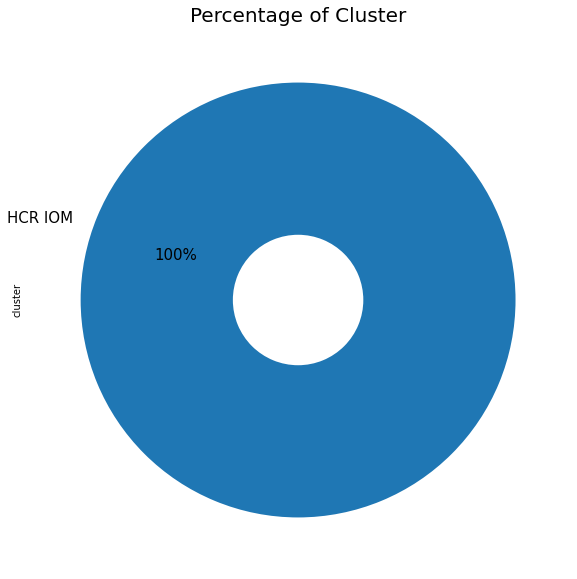

In [29]:
plt.figure(figsize=(30,10))
plt.title('Percentage of Cluster', fontsize=20)
df.cluster.value_counts().plot(kind='pie',
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})

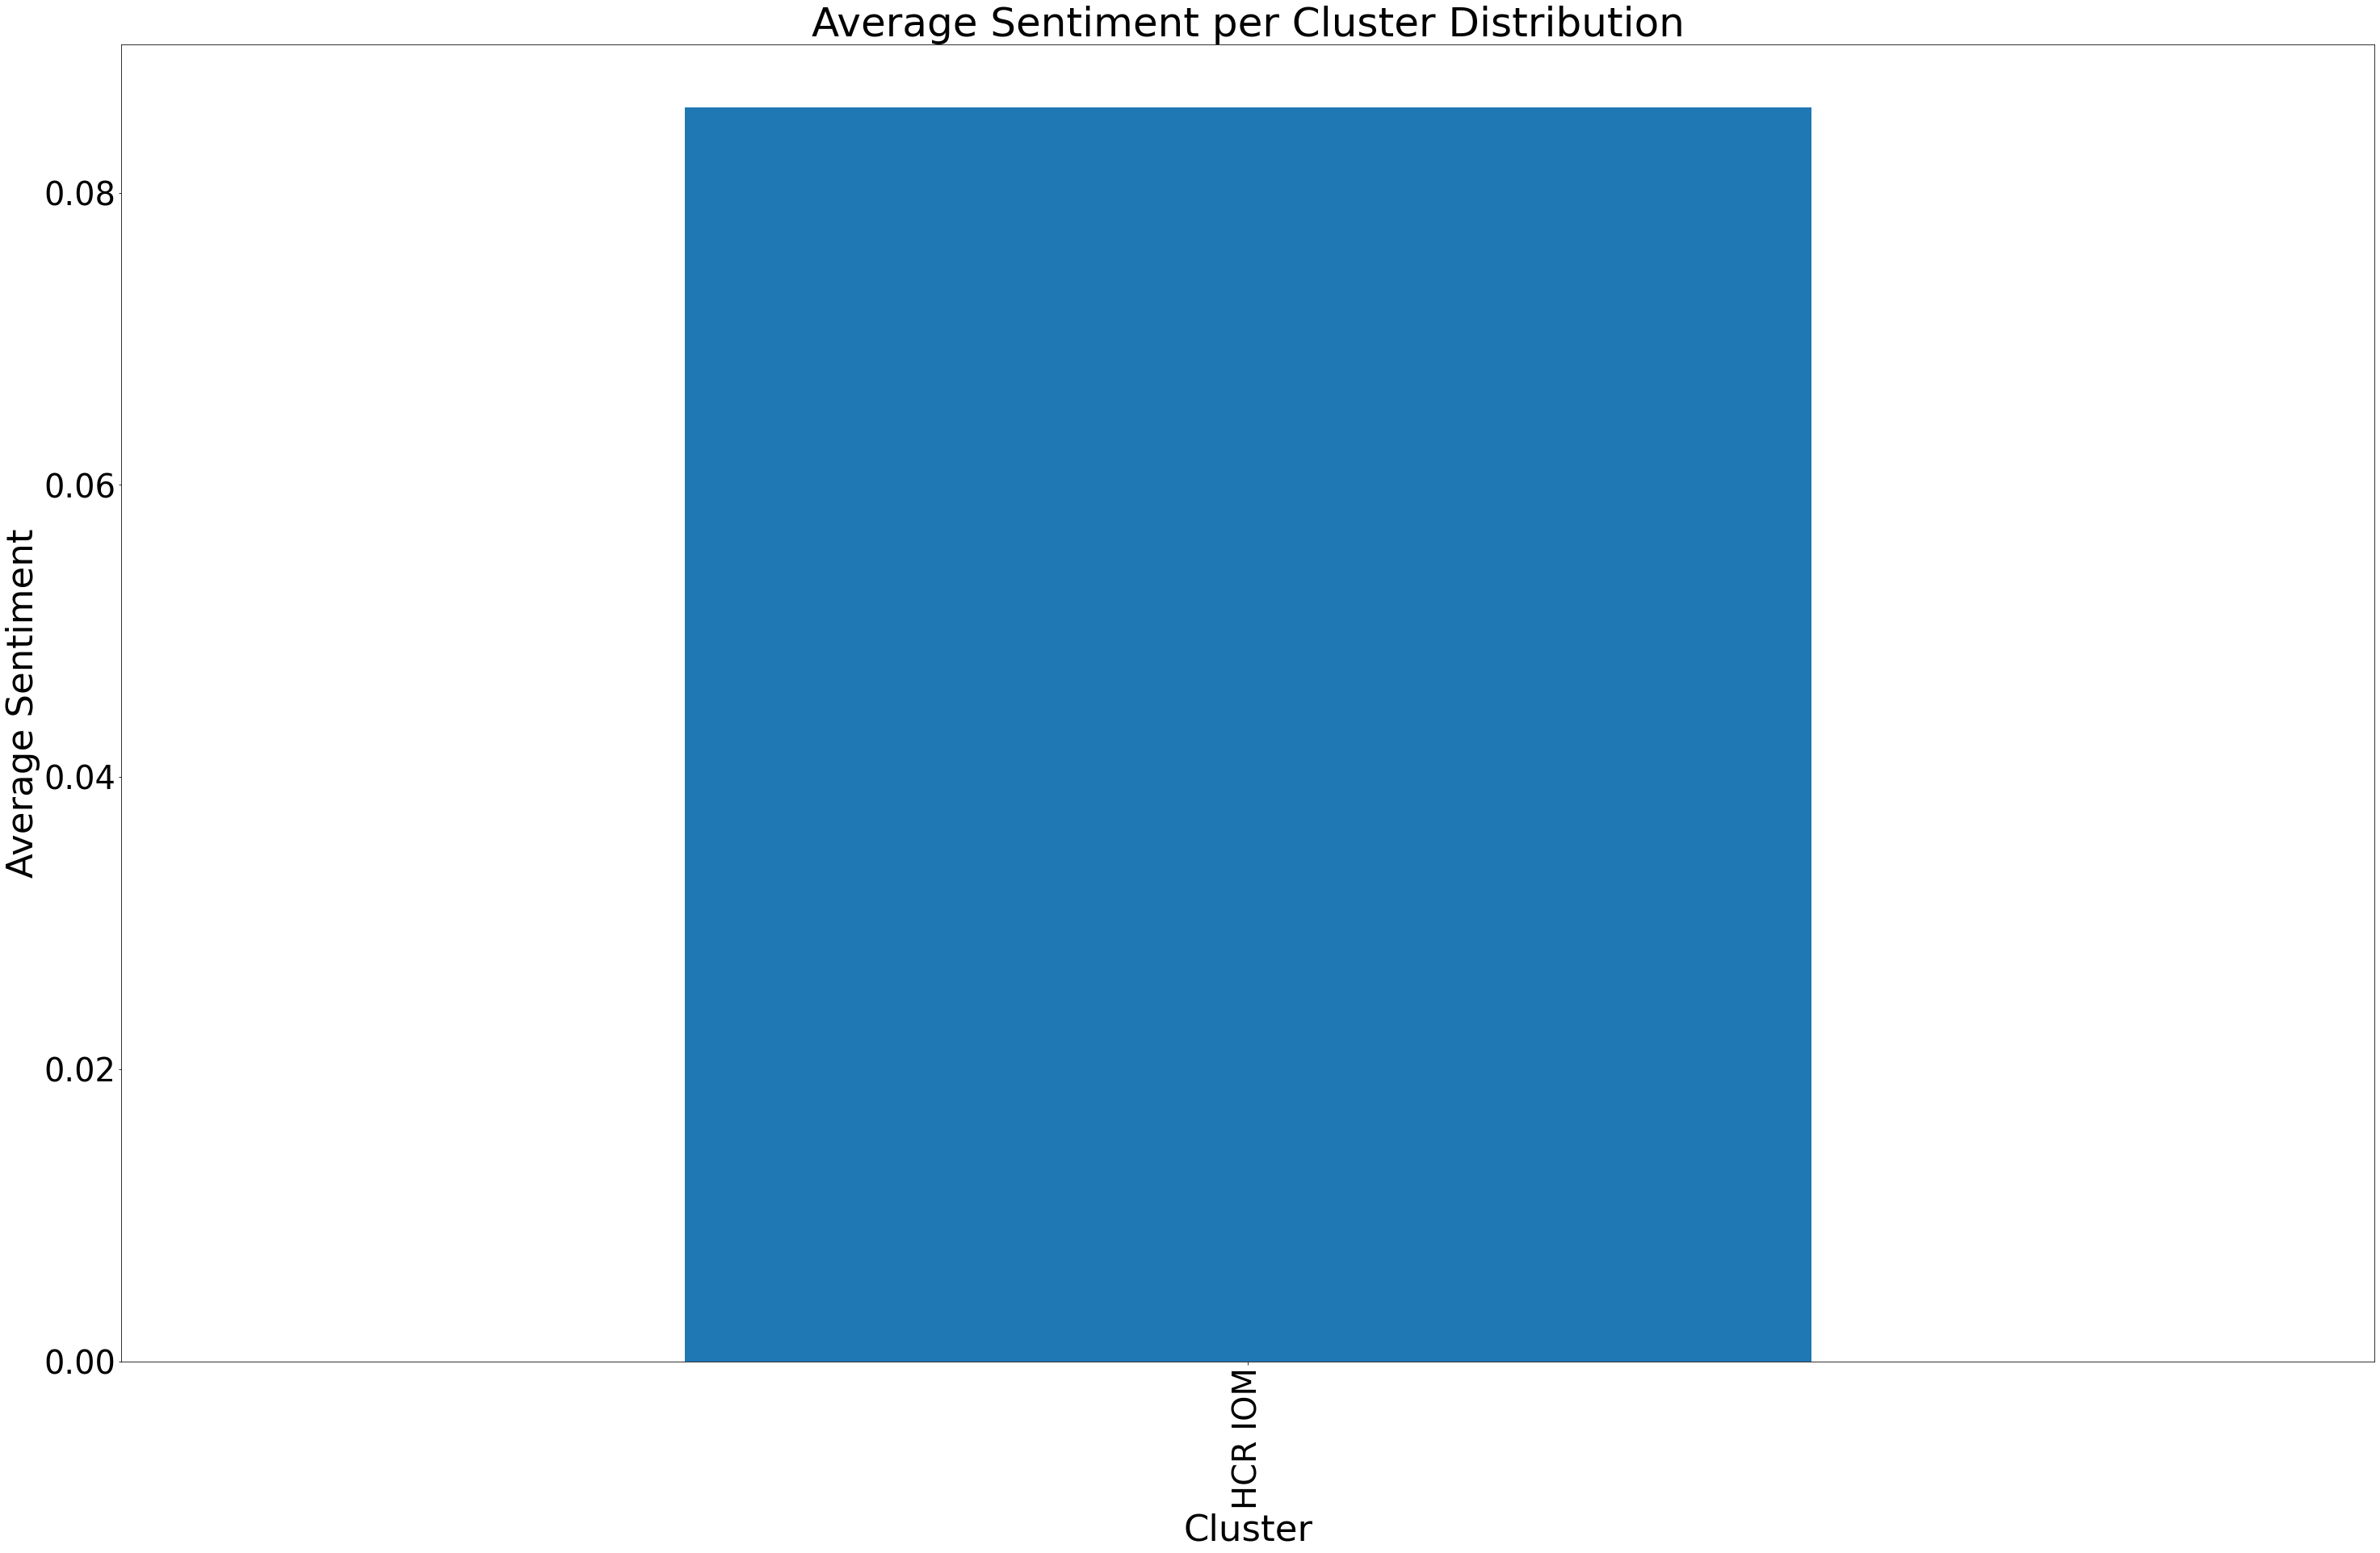

In [30]:
polarity_avg = df.groupby('cluster')['sentiment'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('Cluster', fontsize=45)
plt.ylabel('Average Sentiment', fontsize=45)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Sentiment per Cluster Distribution', fontsize=50)
plt.show()

In [31]:
df['word_count'] = df['lemmatized'].apply(lambda x: len(str(x).split()))
df['word_len'] = df['lemma_str'].astype(str).apply(len)

In [32]:
df

,cluster,lemmatized,lemma_str,sentiment,word_count,word_len
0,HCR IOM,"[global, trendsforced, displacement, 20192019, review, trend, glance, end, 2019, result, persecu...",global trendsforced displacement 20192019 review trend glance end 2019 result persecution con˜ic...,0.085858,113100,907218


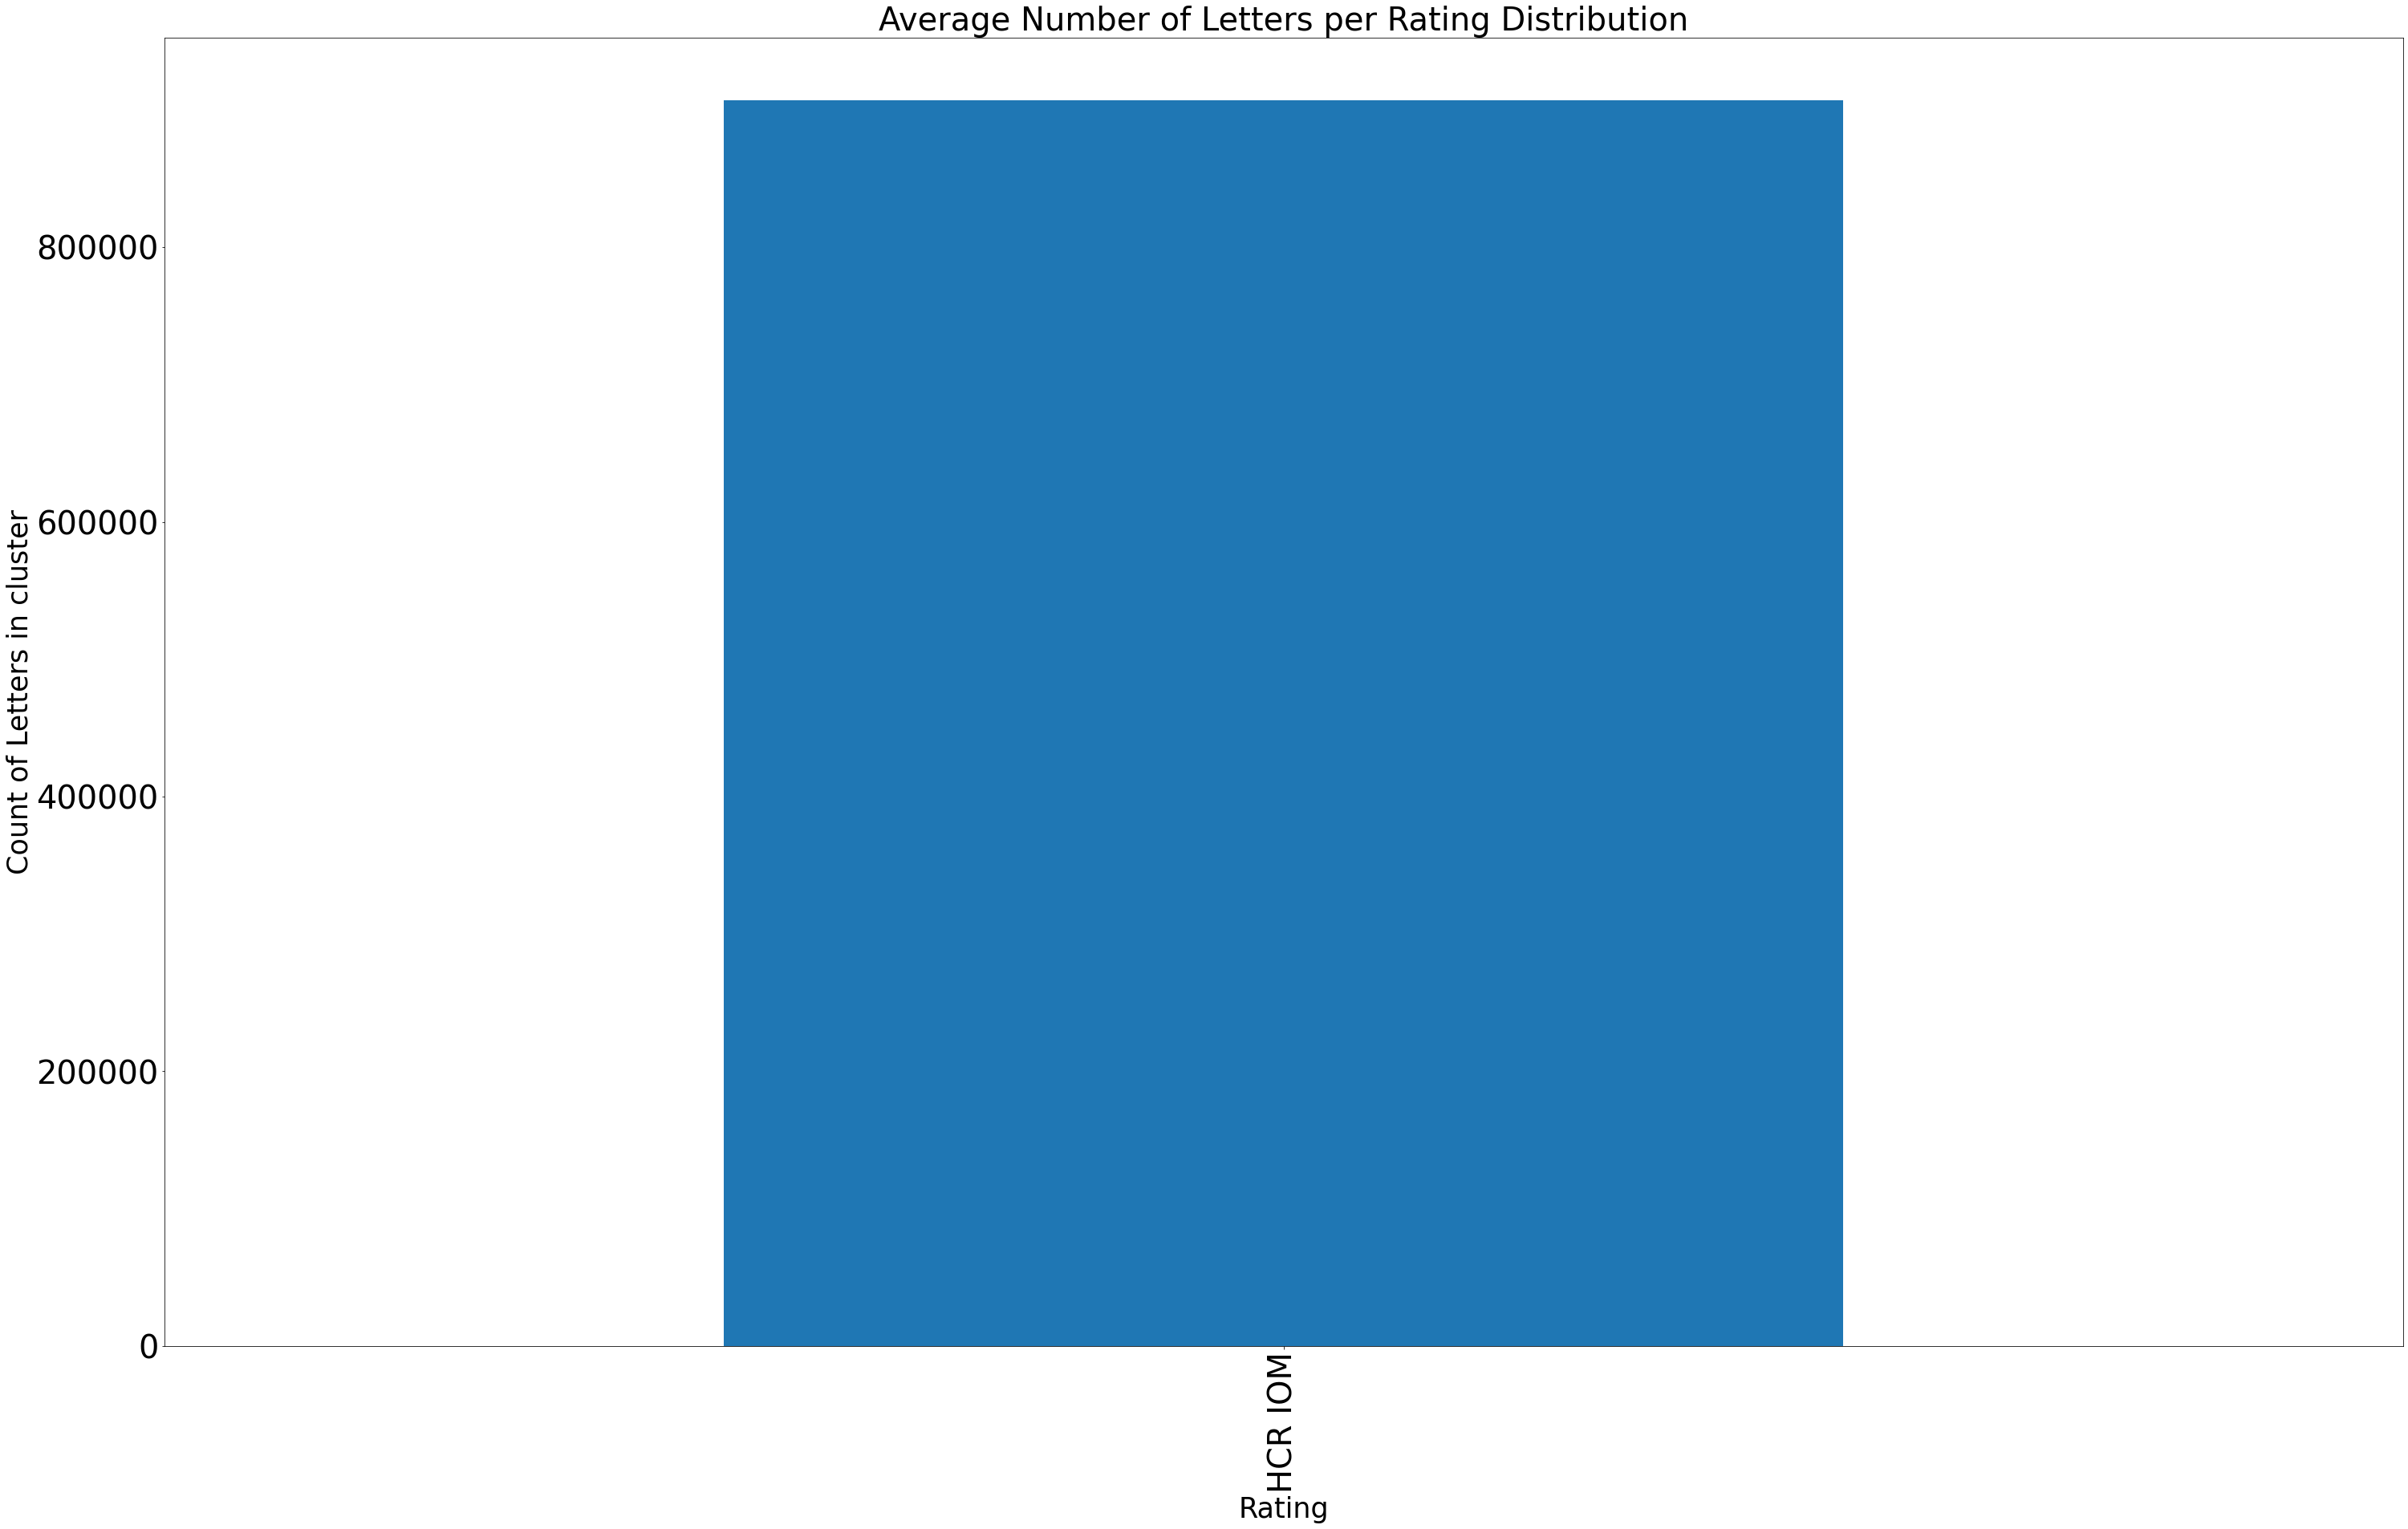

In [33]:
letter_avg = df.groupby('cluster')['word_len'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('Rating', fontsize=35)
plt.ylabel('Count of Letters in cluster', fontsize=35)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Number of Letters per Rating Distribution', fontsize=40)
plt.show()

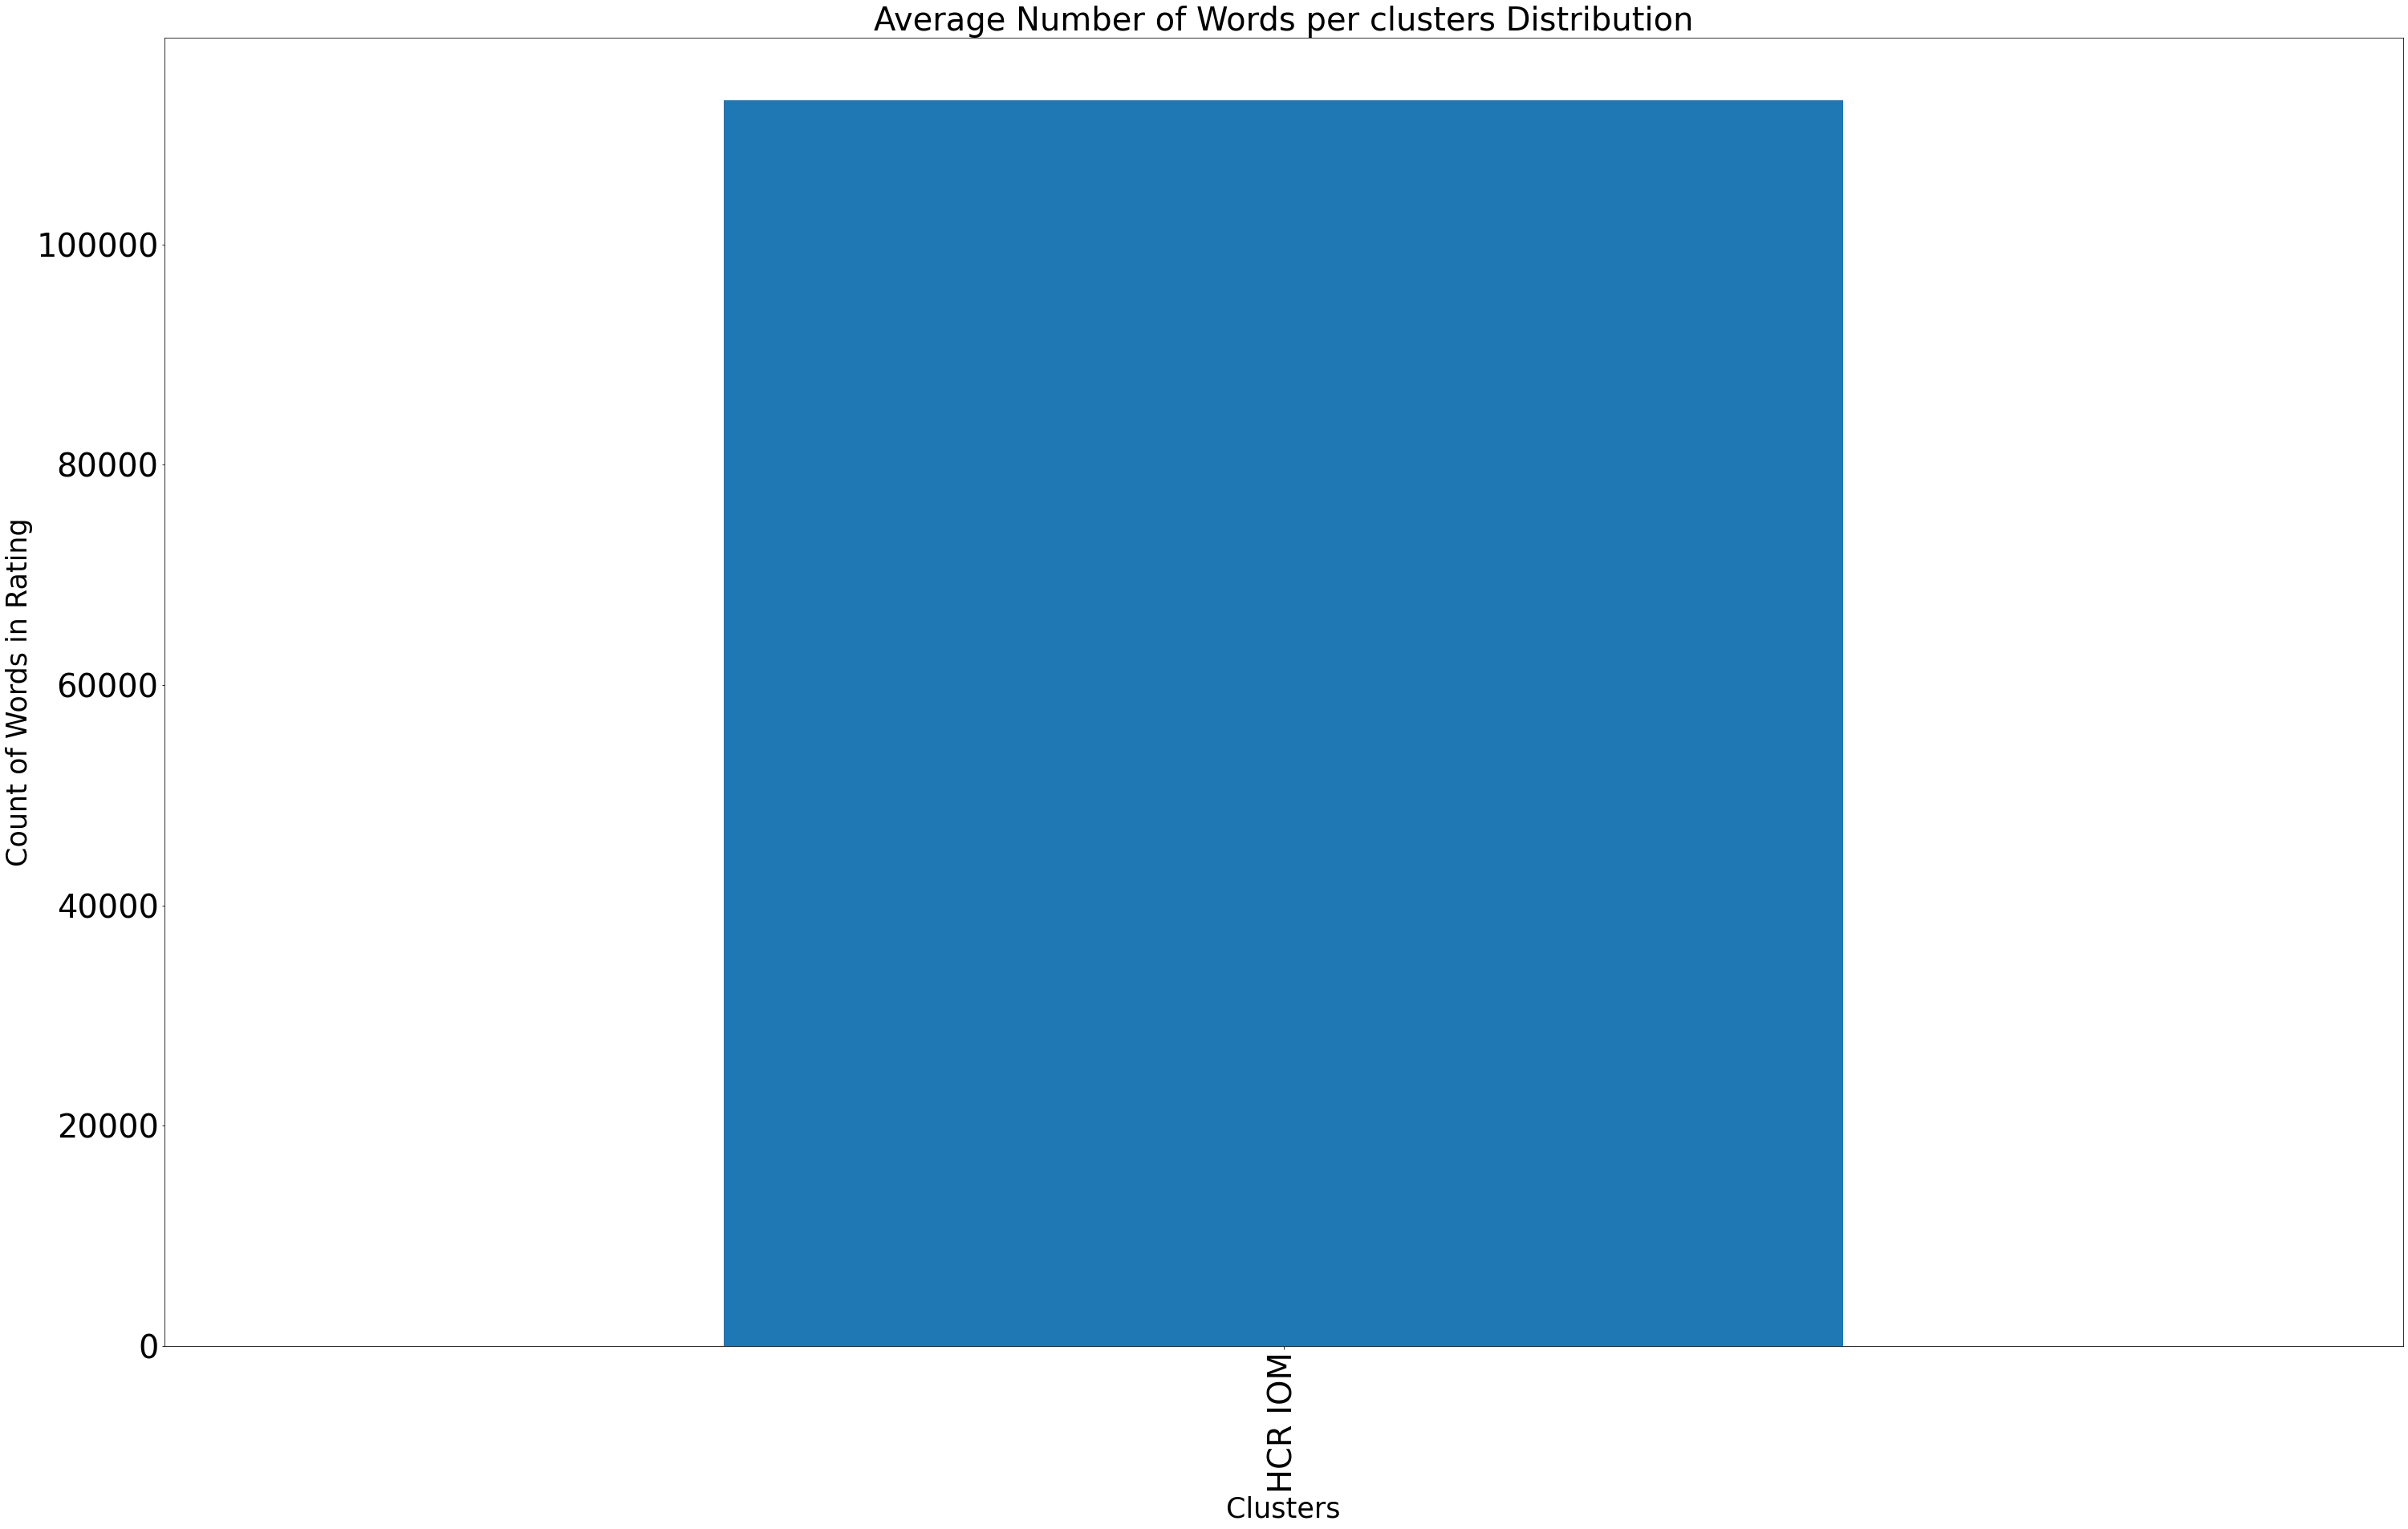

In [34]:
word_avg = df.groupby('cluster')['word_count'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('Clusters', fontsize=35)
plt.ylabel('Count of Words in Rating', fontsize=35)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Number of Words per clusters Distribution', fontsize=40)
plt.show()

## Term Frequency Analysis

In [35]:
words = df['lemmatized']
allwords = []
for wordlist in words:
    allwords += wordlist
print(allwords)

['global', 'trendsforced', 'displacement', '20192019', 'review', 'trend', 'glance', 'end', '2019', 'result', 'persecution', 'con˜ict', 'violence', 'human', 'right', 'violation', 'event', 'seriously', 'disturb', 'public', 'order', '79.5', 'million', 'forcibly', 'displace', 'worldwide', '107,800', 'refugee', 'resettle', 'unhcr', 'submit', '81,600', 'refugee', 'state', 'resettlement', 'accord', 'government', 'statistic', '26', 'country', 'admit', '107,800', 'refugee', 'resettlement', 'year', 'without', 'unhcr™s', 'assistance', '40', 'child', 'estimate', '30', '˜', '34', 'million', '79.5', 'million', 'forcibly', 'displaced', 'person', 'child', '18', 'year', 'age', '5.6', 'million', 'displaced', 'people', 'return', '5.6', 'million', 'displaced', 'people', 'return', 'area', 'country', 'origin', 'include', '5.3', 'million', 'internally', 'displaced', 'person', '317,200', 'refugee', '2.0', 'million', 'new', 'claim', 'asylum-seekers', 'submit', '2.0', 'million', 'new', 'claim', 'unite', 'state'

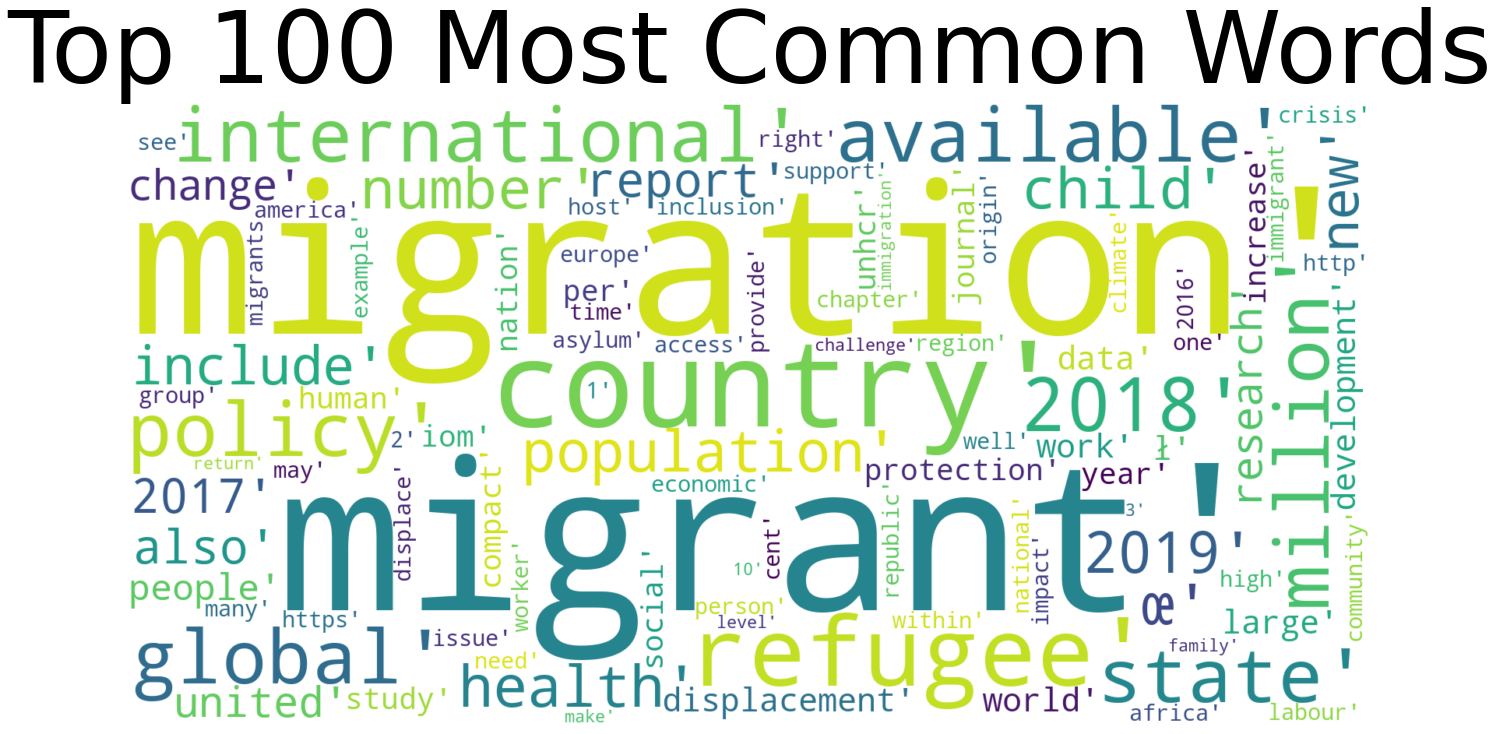

In [36]:
mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=100)
plt.tight_layout(pad=0)
plt.show()

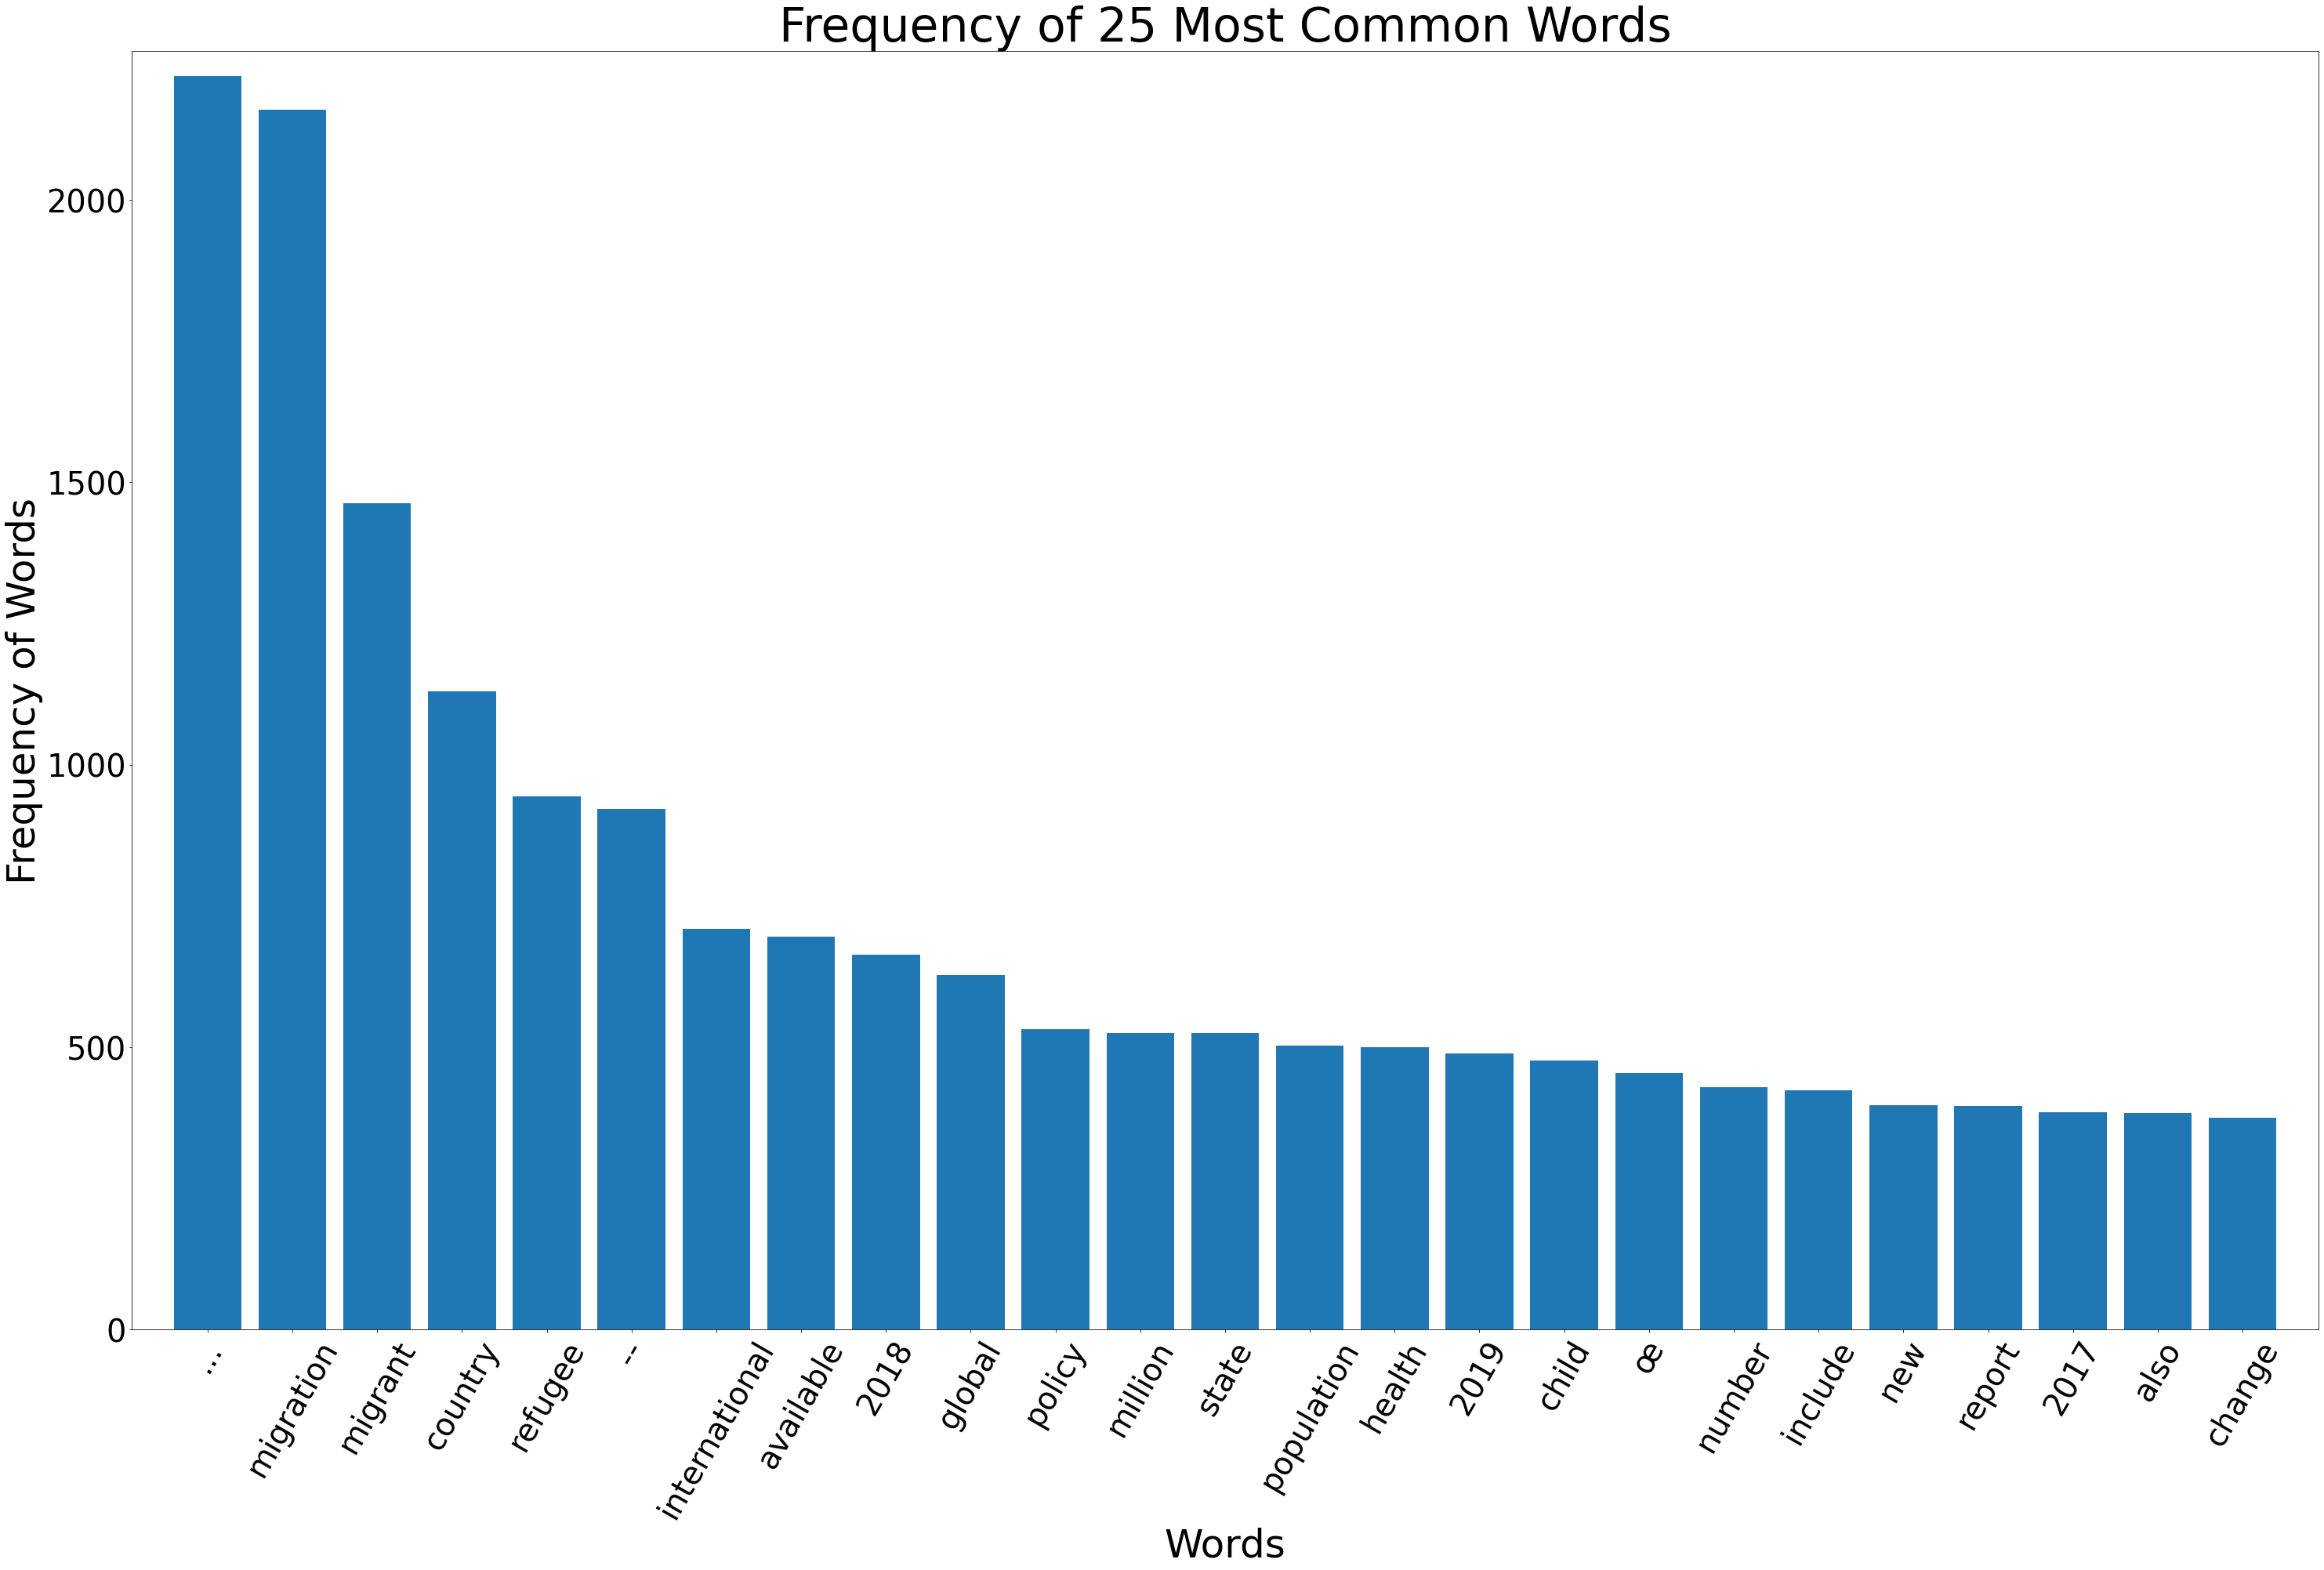

In [37]:
mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words', fontsize=60)
plt.show()

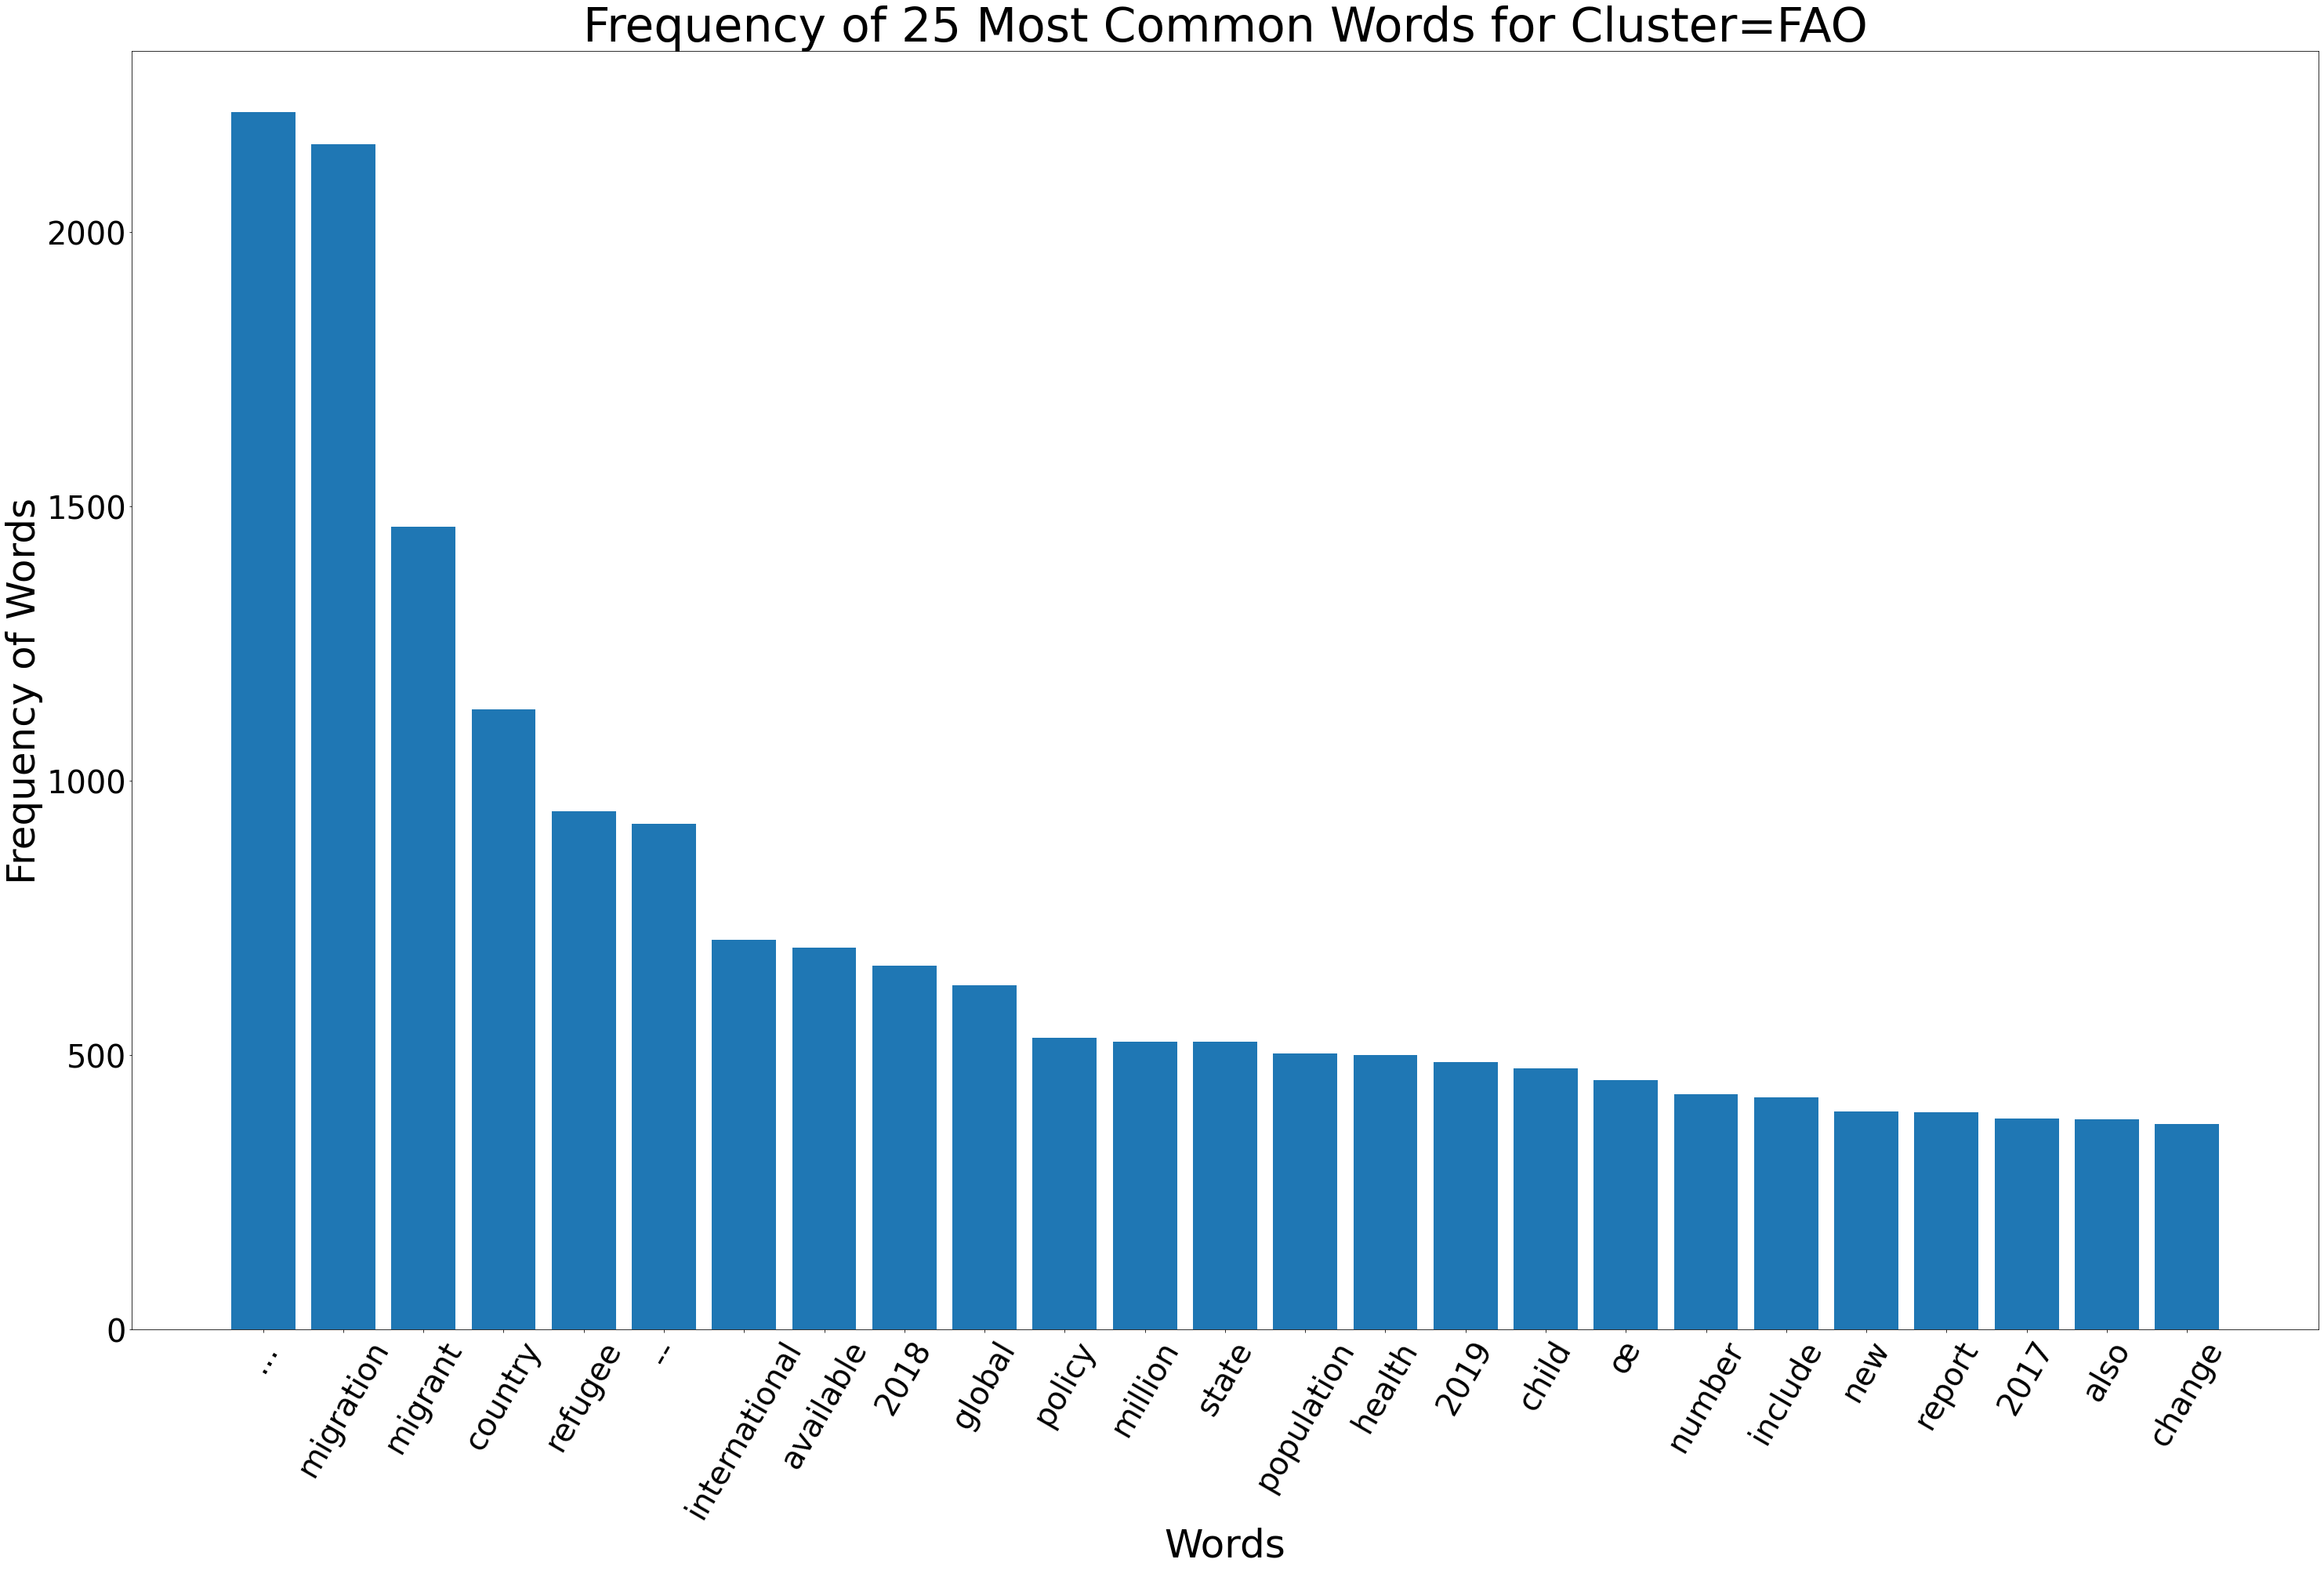

In [38]:
group_by = df.groupby('cluster')['lemma_str'].apply(lambda x: Counter(' '.join(x).split()).most_common(25))
group_by_0 = group_by.iloc[0]
words0 = list(zip(*group_by_0))[0]
freq0 = list(zip(*group_by_0))[1]
plt.figure(figsize=(50,30))
plt.bar(words0, freq0)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Cluster=FAO', fontsize=60)
plt.show()

## Topic Modeling

In [39]:
#tf_vectorizer = CountVectorizer(max_df=0.9, min_df=1, max_features=0)
tf_vectorizer = CountVectorizer(max_df=1.0, min_df=1, max_features=None)
tf = tf_vectorizer.fit_transform(df['lemma_str'].values.astype('U'))
tf_feature_names = tf_vectorizer.get_feature_names()
doc_term_matrix = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))
doc_term_matrix

,00,000,0000000041,0000022124,0001,00010,000100,000116,0001441,00015,...,ﬁworking,ﬁworld,ﬁyemeni,ﬁyou,ﬁyouth,ﬁzero,ﬂan,ﬂcasablanca,ﬂenvironmental,ﬂpeople
0,3,279,1,1,5,1,4,1,1,1,...,1,2,1,1,2,2,1,1,1,1


## Dirichlet Allocation (LDA) Topic Modeling

In [40]:
lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', max_iter=500, random_state=0).fit(tf)
no_top_words = 10
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                          for i in topic.argsort()[:-no_top_words - 1:-1]]))
              
display_topics(lda_model, tf_feature_names, no_top_words)

Topic 0:
migration migrant country refugee 2018 million health report global available
Topic 1:
migration migrant country refugee global international 2018 2019 number state
Topic 2:
migration migrant country global refugee policy available million 2018 population
Topic 3:
migration country migrant international available refugee 2018 policy million health
Topic 4:
migration migrant refugee country 2018 international global child health million
Topic 5:
migration migrant country refugee 2018 international available global 2019 policy
Topic 6:
migration migrant country refugee 2018 international child 2019 health population
Topic 7:
migration migrant country refugee 2019 international state available 2018 health
Topic 8:
migration migrant refugee country global international 2018 state child population
Topic 9:
migration migrant country refugee international 2018 available 2019 population number


## pyLDAvis

In [ ]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, tf, tf_vectorizer, mds='tsne')
panel